In [1]:
# Importar dataset (iris)
# Separar nuestros datos en train y test
# Definir los hiperparametros de nuestro modelo
# Entrenar/Ajutar modelo con train
# Evaluar modelo con test
# Ir a almorzar

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix

In [3]:
data = datasets.load_iris()

In [4]:
X, y = data["data"], data["target"]

In [5]:
data["feature_names"], data["target_names"]

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((120, 4), (120,), (30, 4), (30,))

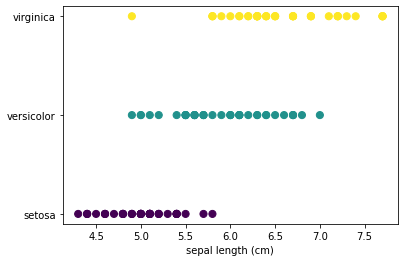

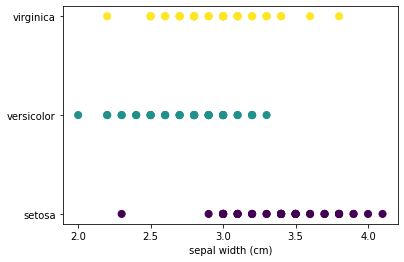

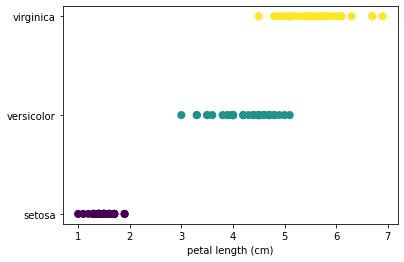

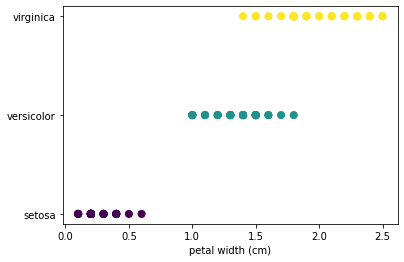

In [8]:
for i in range(X_train.shape[1]):
  plt.scatter(X_train[:,i], y_train, s=50, c=y_train)
  plt.xlabel(data["feature_names"][i])
  plt.yticks([0,1,2], labels=data["target_names"])
  plt.show()

In [9]:
X_train, X_test, = X_train[:,0], X_test[:,0]

In [10]:
X_train

array([7.3, 4.7, 5.7, 4.9, 6.4, 4.8, 5.5, 4.9, 4.9, 6.7, 4.9, 5.7, 6.7,
       7.2, 5.1, 6.3, 6.7, 6.3, 4.4, 5.1, 7.7, 5.6, 5.5, 5.1, 4.8, 6. ,
       5.2, 5.5, 5. , 5. , 5.1, 5.9, 5. , 6.7, 4.5, 7.2, 6.2, 5.7, 6.1,
       6.1, 5. , 4.4, 4.4, 6.5, 6.5, 6. , 6.3, 5.7, 7.2, 7.7, 6.3, 6.7,
       5.4, 6.8, 6.1, 5.4, 5.5, 7.1, 6. , 5.8, 5.1, 5.1, 6.3, 5. , 5.1,
       5.1, 6.5, 4.8, 5.4, 6.1, 5. , 5.5, 6.1, 5.6, 6.9, 7.7, 5. , 5.6,
       6.7, 5.2, 5. , 5.4, 6.1, 6.3, 6.7, 4.6, 4.6, 5. , 6.9, 5.8, 6.4,
       5.1, 5.6, 4.3, 6.2, 5.4, 4.9, 6.3, 5.8, 6.3, 6.2, 6.4, 6.5, 4.6,
       6.6, 5.3, 7.7, 5.8, 6.9, 6. , 7.4, 5.2, 6.4, 6.4, 4.8, 7. , 5.4,
       5.2, 5.9, 5.8])

In [11]:
def softmax(logits):
  exponenciales = np.exp(logits)
  return exponenciales/np.sum(exponenciales)
  X_train=softmax(X_hat_train)

In [12]:
model = LogisticRegression(penalty='none', multi_class='multinomial')

In [29]:
model.fit(X_train.reshape(-1, 1), y_train)

LogisticRegression(multi_class='multinomial', penalty='none')

In [14]:
y_hat_test = model.predict(X_test.reshape(-1, 1))

In [15]:
y_hat_probs = model.predict_proba(X_test.reshape(-1, 1))

In [16]:
y_hat_conf = model.decision_function(X_test.reshape(-1, 1))

In [17]:
y_hat_conf.min()

-8.612484724961153

In [18]:
y_hat_conf.max()

6.01987609579518

In [19]:
confidence_threshold = y_hat_conf > 30

In [20]:
results = []
for i, conf in enumerate(confidence_threshold):
  argmax = y_hat_test[i]
  if conf[argmax]:
    results.append([i, argmax, y_hat_probs[i][argmax], y_hat_conf[i][argmax]])

In [21]:
results = np.array(results)

In [22]:
results # high confidence results

array([], dtype=float64)

In [23]:
y_hat_train = model.predict(X_train.reshape(-1, 1))

In [24]:
multilabel_confusion_matrix(y_train, y_hat_train) / y_train.shape[0]

array([[[0.58333333, 0.05833333],
        [0.025     , 0.33333333]],

       [[0.58333333, 0.1       ],
        [0.14166667, 0.175     ]],

       [[0.58333333, 0.09166667],
        [0.08333333, 0.24166667]]])

In [25]:
multilabel_confusion_matrix(y_test, y_hat_test) /  y_test.shape[0]

array([[[0.76666667, 0.        ],
        [0.06666667, 0.16666667]],

       [[0.43333333, 0.16666667],
        [0.1       , 0.3       ]],

       [[0.53333333, 0.1       ],
        [0.1       , 0.26666667]]])

- True Positive (tp): target=1 & prediction=1
- False Positive (fp): target=0 & prediction=1

- True Negative (tn): target=0 & prediction=0
- False Negative (fn): target=1 & prediction=0


![class_metrics_table](https://miro.medium.com/max/974/1*H_XIN0mknyo0Maw4pKdQhw.png)

In [26]:
y_hat_train = model.predict(X_train.reshape(-1, 1))

In [27]:
multilabel_confusion_matrix(y_train, y_hat_train) / y_train.shape[0]

array([[[0.58333333, 0.05833333],
        [0.025     , 0.33333333]],

       [[0.58333333, 0.1       ],
        [0.14166667, 0.175     ]],

       [[0.58333333, 0.09166667],
        [0.08333333, 0.24166667]]])